# To predict Admission Prediction

### Linear Regression Task

# Introduction
* Dataset contain information about the 500 student who have applied to different colleges for their masters course & contain information about different parameter that are used by universites to judge the merit of candidate.

## Different parameter information

* GRE Score = (Graduate Record Exam) test is a standardised test used to fetch admission in various school and business graduate colleges in various countries,especially USA.

* TOEFL Score = (Test of English as a Foreign Language), you need to have passed in 10+2 from any recognized Indian Board or University. The test measures your Proficiency in the English Language so that you can study and work in the United States. Candidates of any age can take the TOEFL exam.

* University Ranking = Student undergraduate university ranking.

* SOP = (Statement of Purpose strength), is a reflection of your personality that you portray in front of the admissions committee for getting enrolled in universities abroad.

* LOR = Letter of Recommendation strength.

* CGPA = (Cumulative Grade point Average),it is used for colleges to measure the Overall Acadmic performance of a student for year and the total score.

* Research = Whether student has research experience or not.

* Chance of Admit = Admission chance

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
data=pd.read_excel("Admission_Prediction.xlsx")
pd.set_option('display.max_rows',None)

In [3]:
# call the dataframe & do basic checks
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [4]:
# calling last five 
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73
499,500.0,327.0,113.0,4.0,4.5,4.5,9.04,0.0,0.84


In [5]:
# statistics of data
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


* As student got more score in GRE as compaired to TOEFL.
* More number of Students attempt TOEFL Exam than GRE. 


In [6]:
# Examine the data
data.info()
#no missing value in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    float64
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    float64
 8   Chance of Admit    500 non-null    float64
dtypes: float64(9)
memory usage: 35.3 KB


* Dataset contains float type of data.

In [7]:
data.shape

(500, 9)

* Dataset contains 500 observations & 9 columns.

In [8]:
data.index

RangeIndex(start=0, stop=500, step=1)

# Exploratory Data Analysis

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

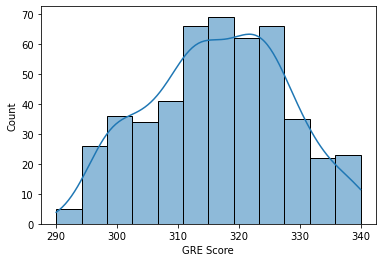

In [9]:
# step1:- univariate analysis
# analysing GRE
sns.histplot(x='GRE Score',data=data,kde=True)

* as above graph shows GRE Score range between 310 to 330.

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

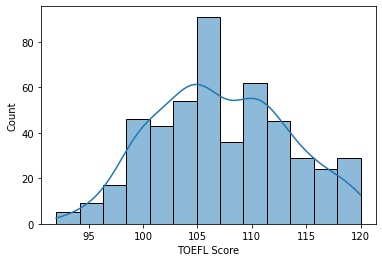

In [10]:
#analysing TOEFL Score
sns.histplot(x='TOEFL Score',data=data,kde=True)

* as above graph shows TOEFL Score range between 105 to 110.

<AxesSubplot:xlabel='University Rating', ylabel='Count'>

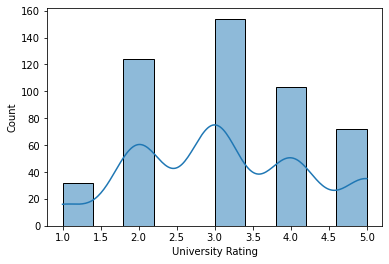

In [11]:
#analysis of University Rating
sns.histplot(x='University Rating',data=data,kde=True)

* as above graph University Rating maximum in range 3 to 3.5.

<AxesSubplot:xlabel='SOP', ylabel='Count'>

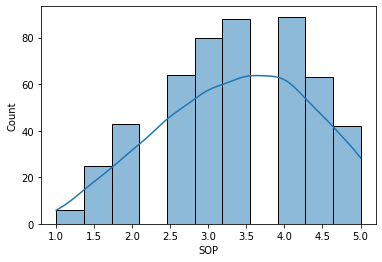

In [12]:
# analysis of SOP
sns.histplot(x='SOP',data=data,kde=True)

* as above graph show sop range maximum at 2.5 to 3.5.

<AxesSubplot:xlabel='LOR', ylabel='Count'>

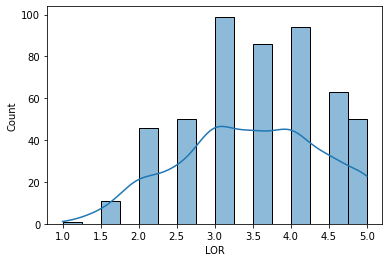

In [13]:
#analysis of LOR
sns.histplot(x='LOR',data=data,kde=True)

* as above graph show maximum LOR in range 3 to 4.

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

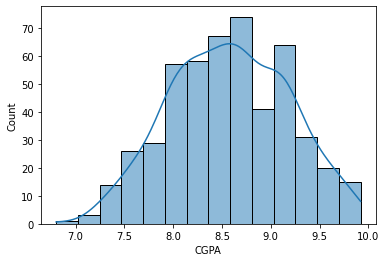

In [14]:
#analysis of CGPA
sns.histplot(x='CGPA',data=data,kde=True)

* as above graph show CGPA in maximum range of 8 to 9

<AxesSubplot:xlabel='Research', ylabel='Count'>

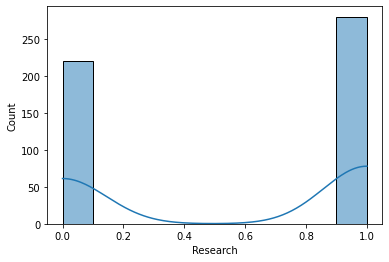

In [15]:
#analysis of research
sns.histplot(x='Research',data=data,kde=True)

* as above graph show research maximum range of 1.

### Bivariate Analysis & Multivariate analysis

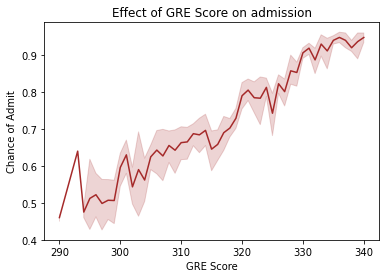

In [16]:
# Check relationship between GRE Score & chances of admit with university rating
sns.lineplot(x='GRE Score',y='Chance of Admit',data=data,color='brown')
plt.title('Effect of GRE Score on admission')
plt.show()

#### Observation:
* As GRE Score more then chances of admission also more.

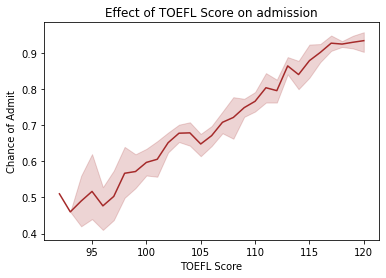

In [17]:
# Checking the relationship between TOEFL Score and Chance of Admit with university rating.
sns.lineplot(x='TOEFL Score',y='Chance of Admit',data=data,color='brown')
plt.title("Effect of TOEFL Score on admission")
plt.show()

#### Observation
* As TOEFL Score is more as chances of admission is more.

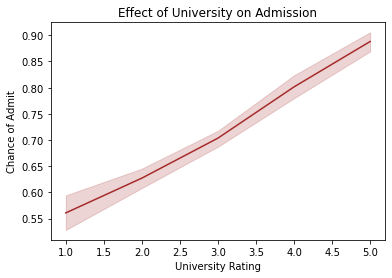

In [18]:
# Check the relationship between University Rating & Chance of Admit
sns.lineplot(x='University Rating',y='Chance of Admit',data=data,color='brown')
plt.title("Effect of University on Admission")
plt.show()

#### Observation
* University rating of 5 have more chances to get admission.

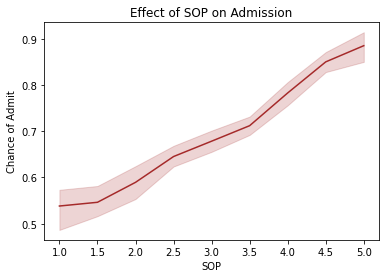

In [19]:
# Check relationship between SOP and Chances of Admit
sns.lineplot(x='SOP',y='Chance of Admit',data=data,color='brown')
plt.title("Effect of SOP on Admission")
plt.show()

#### Observation
* SOP range between 4 to 5 have more chances of admission.

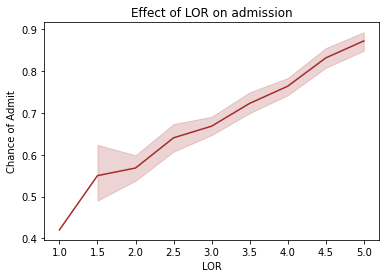

In [20]:
# Relationship between LOR & Chances of Admit
sns.lineplot(x='LOR',y='Chance of Admit',data=data,color='brown')
plt.title("Effect of LOR on admission")
plt.show()

#### Observation
* As LOR Score increases chances of admission also increases.

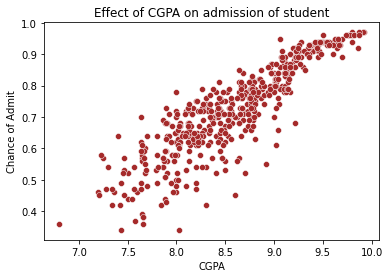

In [21]:
# Relationship between CGPA & Chance of Admit
sns.scatterplot(x='CGPA',y='Chance of Admit',data=data,color='brown')
plt.title("Effect of CGPA on admission of student")
plt.show()

#### Observation
* As CGPA increases chances of admission also increases.

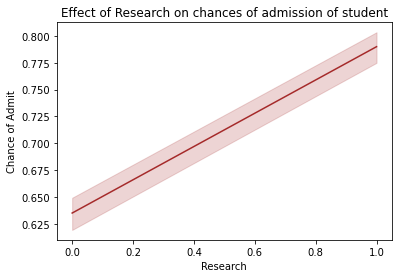

In [22]:
# Check relationship between Research & Chance of Admit
sns.lineplot(x='Research',y='Chance of Admit',data=data,color='brown')
plt.title("Effect of Research on chances of admission of student")
plt.show()

#### Observation
* As Researcher increases more chance of admission.

## Multivariant Analysis

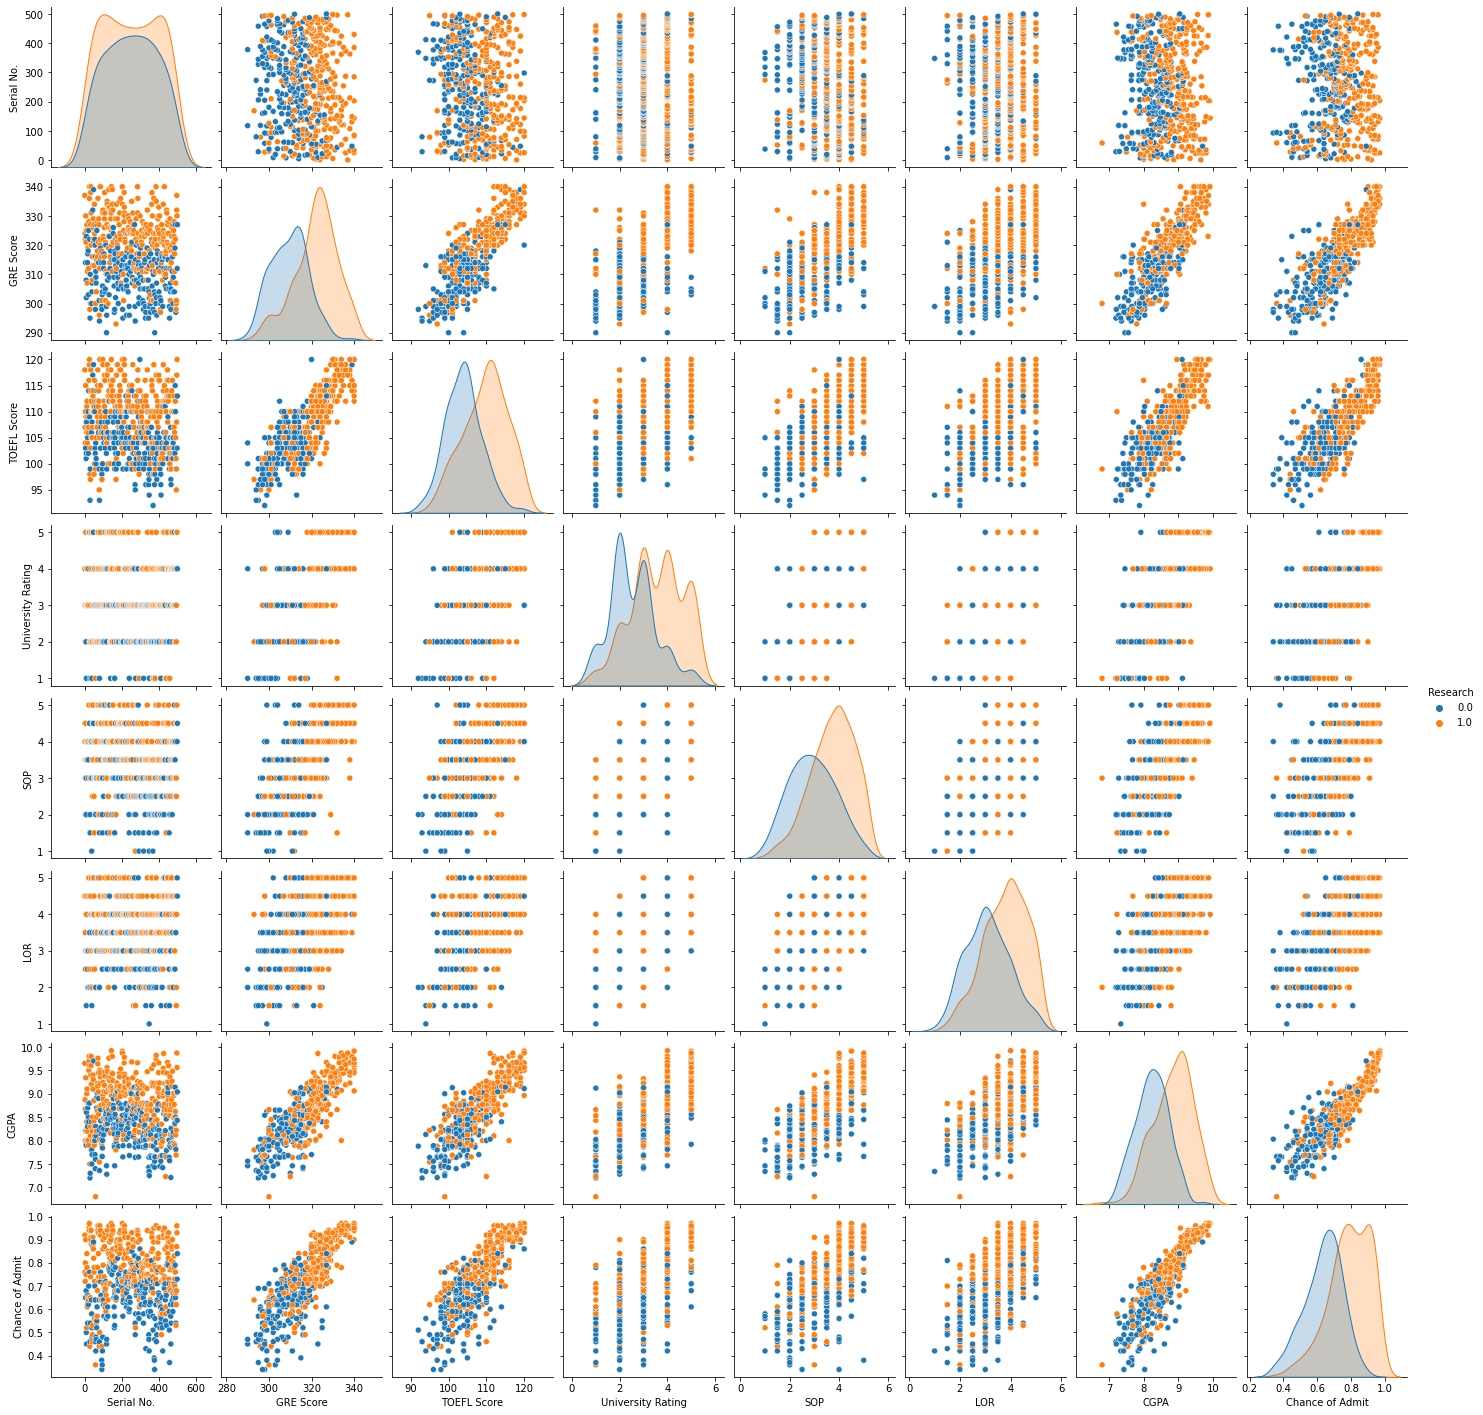

In [23]:
sns.pairplot(data,hue="Research")
plt.show()

# Data Preprocessing & Feature Engineering

In [24]:
# Check missing value
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

* GRE Score,TOEFL Score,University Rating have missing values.

In [25]:
# Replacing mean to missing data
data.loc[data['GRE Score'].isnull()==True,'GRE Score']=data['GRE Score'].mean()
data.loc[data['TOEFL Score'].isnull()==True,'TOEFL Score']=data['TOEFL Score'].mean()
data.loc[data['University Rating'].isnull()==True,'University Rating']=data['University Rating'].mean()

In [26]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* All missing values replaced with mean.

In [27]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.000000,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.000000,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.558763,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.000000,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.000000,103.0,2.0,2.0,3.0,8.21,0.0,0.65


### Outlier handling

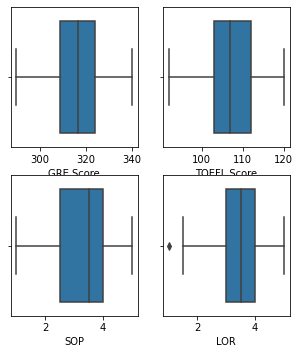

In [28]:
box=data[['GRE Score','TOEFL Score','SOP','LOR']]
plt.figure(figsize=(5,15),facecolor='white')
plotnumber=1  #counter

for column in box:
    if plotnumber<=5:
        plt.subplot(5,2,plotnumber)
        sns.boxplot(box[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1

#### Observations
* No outliers present in GRE Score,TOEFL Score,SOP.
* Only LOR present outliers.

In [29]:
from scipy import stats

In [30]:
IQR=stats.iqr(data.LOR,interpolation='midpoint')
IQR

1.0

In [31]:
# Getting min & max limit
# 1st quantile
Q1=data.LOR.quantile(0.25)

# 3rd quantile
Q3=data.LOR.quantile(0.75)

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [32]:
lower_limit

1.5

In [33]:
upper_limit

5.5

In [34]:
data.loc[data['LOR']>upper_limit]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [35]:
data.loc[data['LOR']<lower_limit]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,348.0,299.0,94.0,1.0,1.0,1.0,7.34,0.0,0.42


In [36]:
# Handling outliers by median
data.loc[data['LOR']<lower_limit,'LOR']=np.median(data.LOR)

<AxesSubplot:xlabel='LOR'>

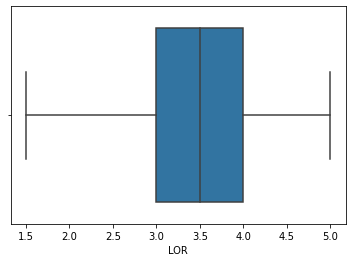

In [37]:
sns.boxplot(data.LOR)

* Outliers successfully removed from LOR. 

# Feature selection

In [38]:
#step1 :-dropping unwanted variable
l1=['Serial No.']
data.drop(l1,axis=1,inplace=True)

In [39]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0.0,0.65


<AxesSubplot:>

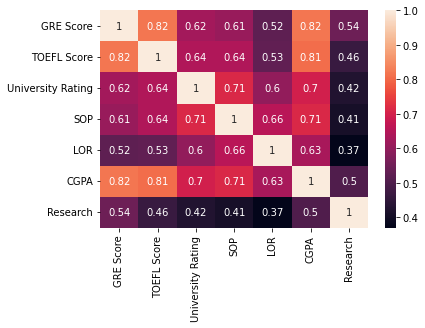

In [40]:
#step2:-checking the correlation
sns.heatmap(data.drop('Chance of Admit',axis=1).corr(),annot=True)

# Model Creation

In [41]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [42]:
#step1:-dependant & independant variable creation
x=data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]
y=data['Chance of Admit']

In [43]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.000000,4.000000,4.5,4.5,9.65,1.0
1,324.000000,107.000000,4.000000,4.0,4.5,8.87,1.0
2,316.558763,104.000000,3.000000,3.0,3.5,8.00,1.0
3,322.000000,110.000000,3.000000,3.5,2.5,8.67,1.0
4,314.000000,103.000000,2.000000,2.0,3.0,8.21,0.0
5,330.000000,115.000000,5.000000,4.5,3.0,9.34,1.0
6,321.000000,109.000000,3.121649,3.0,4.0,8.20,1.0
7,308.000000,101.000000,2.000000,3.0,4.0,7.90,0.0
8,302.000000,102.000000,1.000000,2.0,1.5,8.00,0.0
9,323.000000,108.000000,3.000000,3.5,3.0,8.60,0.0


In [44]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
30     0.65
31     0.74
32     0.91
33     0.90
34     0.94
35     0.88
36     0.64
37     0.58
38     0.52
39     0.48
40     0.46
41     0.49
42     0.53
43     0.87
44     0.91
45     0.88
46     0.86
47     0.89
48     0.82
49     0.78
50     0.76
51     0.56
52     0.78
53     0.72
54     0.70
55     0.64
56     0.64
57     0.46
58     0.36
59     0.42
60     0.48
61     0.47
62     0.54
63     0.56
64     0.52
65     0.55
66     0.61
67     0.57
68     0.68
69     0.78
70     0.94
71     0.96
72     0.93
73     0.84
74     0.74
75     0.72
76     0.74
77     0.64
78     0.44
79     0.46
80     0.50
81     0.96
82     0.92
83  

In [45]:
#step2:-Training & testing data creation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)


In [46]:
x_train.shape

(400, 7)

In [47]:
y_train.shape

(400,)

In [48]:
#step3:-model creating
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict=LR.predict(x_test)

In [49]:
y_test.shape

(100,)

In [50]:
y_predict

array([0.79633627, 0.84806765, 0.65404813, 0.88371222, 0.93480193,
       0.76470955, 0.63564499, 0.76928566, 0.77325312, 0.83480031,
       0.6615834 , 0.5864513 , 0.76619491, 0.72419432, 0.80431649,
       0.65167905, 0.49556182, 0.70158443, 0.84520172, 0.63367091,
       0.5396997 , 0.70512234, 0.83680722, 0.76608955, 0.58068718,
       0.48313653, 0.55891753, 0.57117528, 0.94836871, 0.72218818,
       0.96399287, 0.83175162, 0.86252102, 0.86106293, 0.83617026,
       0.80954739, 0.59132813, 0.61824733, 0.67245869, 0.9125125 ,
       0.73833486, 0.94046184, 0.84895532, 0.82465112, 0.83111581,
       0.62847382, 0.85749372, 0.78650784, 0.74408429, 0.65255592,
       0.7824653 , 0.73231284, 0.64848884, 0.92391251, 0.60291463,
       0.89547776, 0.85536164, 0.74773859, 0.56125159, 0.69715403,
       0.65451248, 0.94992773, 0.91791901, 0.72621617, 0.705111  ,
       0.71401912, 0.95048436, 0.89438497, 0.75029259, 0.97723748,
       0.69250322, 0.53253743, 0.82713572, 0.83114865, 0.53685

In [51]:
#step4:- model evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score=r2_score(y_test,y_predict)

In [52]:
r2_score

0.7687372730765913

In [53]:
x_test.shape

(100, 7)

In [54]:
#calculation of adjusted r2score
adjusted_r2=1-(1-0.76)*(100-7)/(100-7-1)

In [55]:
adjusted_r2

0.7573913043478261

In [56]:
#root mean squared error
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

0.004260451462510112
0.06527213388966314


In [57]:
print(mean_absolute_error(y_test,y_predict))

0.045668551830964514
